
# 1. _Ocorrências aeronáuticas na aviação civil brasileira_
##### Introdução a Banco de Dados - 2019/2 - Turma TM

In [1]:
!python database_creator.py

In [2]:
# Basic imports
import numpy
import seaborn
import sqlite3
import pandas as pd
from matplotlib import pyplot

In [3]:
pd.set_option('display.max_columns', None)
seaborn.set_style("darkgrid")

### 2. Membros

* Gabriel Luz - 2017015126
* Elves M. Rodrigues - PUT NUMBER
*  Luiz Henrique Melo - 2017014464
* Otavio Augusto Silva - 2016006808 

### 3. Descrição dos dados

#### Preâmbulo

Neste tópico será feita uma amostragem dos dados por meio da biblioteca Pandas do Python e observações do tipo dos dados que serão utilizados, tais como dados faltantes, além da promoção da junção das tabelas em uma única, a fim de melhor organização dos dados para futura instanciação.

Os dados têm como fonte o Portal Brasileiro de Dados Abertos, podendo ser acessado por [aqui](http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira).

A imagem abaixa foi extraída da URL original da fonte dos dados e provém uma melhor descrição dos dados, tal como a sua fonte e seu schema.

![title](images/data_model.png)

#### Amostragem dos dados

##### Aeronaves envolvidas no acidente

In [4]:
anv = pd.read_csv('../data/anv.csv', sep='~')
anv

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fase_operacao_icao,aeronave_tipo_operacao,aeronave_nivel_dano,total_fatalidades,aeronave_dia_extracao
0,201106142171203,PPGXE,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,2.0,1962.0,BRASIL,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,UNKNOWN,VOO DE INSTRUÇÃO,SUBSTANCIAL,0,2019-05-31
1,201205209591320,PTRBN,OPERADOR DE AERONAVE,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,ATÉ 2250 KG,6.0,1980.0,BRASIL,BRASIL,TPX,TÁXI AÉREO,****,****,APROXIMAÇÃO FINAL,APPROACH,TÁXI AÉREO,NENHUM,0,2019-05-31
2,201012015549851,PTKUK,OPERADOR DE AERONAVE,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,ENTRE 2250 E 5700 KG,7.0,1961.0,ESTADOS UNIDOS,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,LANDING,TÁXI AÉREO,LEVE,0,2019-05-31
3,201708190325167,PTKUK,OPERADOR PARTICULAR,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,ENTRE 2250 E 5700 KG,7.0,1961.0,ESTADOS UNIDOS,BRASIL,SAE,ESPECIALIZADA,SBCP,SBCP,CRUZEIRO,EN ROUTE,OPERAÇÃO ESPECIALIZADA,LEVE,0,2019-05-31
4,201803182255192,PPGSZ,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,2.0,1960.0,BRASIL,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,ARREMETIDA NO SOLO,APPROACH,VOO DE INSTRUÇÃO,LEVE,0,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,201903271943019,PRFKU,OPERADOR PARTICULAR,AVIÃO,AIR TRACTOR,AT-502,AT5T,TURBOÉLICE,MONOMOTOR,2948,ENTRE 2250 E 5700 KG,1.0,1991.0,NaN,BRASIL,SAE-AG,AGRÍCOLA,****,****,DECOLAGEM,TAKEOFF,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,0,2019-05-31
5519,201904241650016,PPSEK,OPERADOR PARTICULAR,HELICÓPTERO,ROBINSON HELICOPTER,R44 II,R44,PISTÃO,MONOMOTOR,1134,ATÉ 2250 KG,4.0,2007.0,ESTADOS UNIDOS,BRASIL,TPP,PARTICULAR,###!,SBCN,CRUZEIRO,EN ROUTE,VOO PRIVADO,NENHUM,0,2019-05-31
5520,201904261718061,N100QR,OPERADOR PARTICULAR,AVIÃO,CANADAIR,CL-600-1A11,CL60,JATO,BIMOTOR,20457,ACIMA DE 5700 KG,NaN,1982.0,NaN,ESTADOS UNIDOS,TPP,PARTICULAR,SADF,SBCB,APROXIMAÇÃO FINAL,APPROACH,VOO PRIVADO,NENHUM,0,2019-05-31
5521,201905061442135,PRCGF,OPERADOR DE AERONAVE,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,S92,TURBOEIXO,***,12020,ACIMA DE 5700 KG,NaN,2012.0,NaN,BRASIL,TPX,TÁXI AÉREO,SBCP,SBCP,SUBIDA,EN ROUTE,TÁXI AÉREO,NENHUM,0,2019-05-31


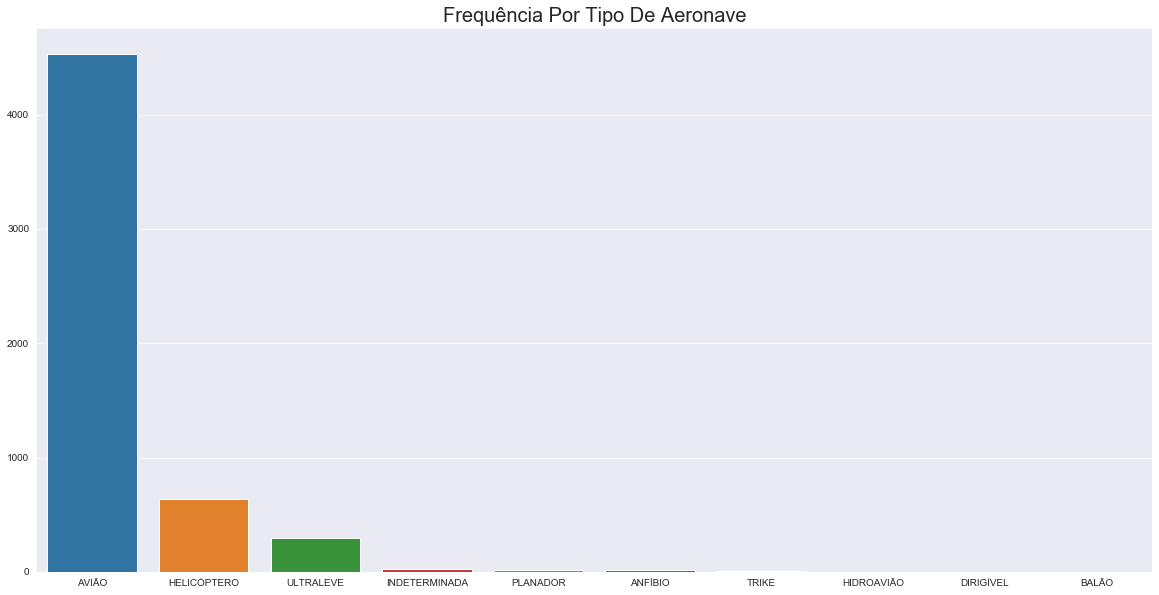

In [7]:
s, n = numpy.unique(anv["aeronave_tipo_veiculo"].to_numpy(), return_counts=True)
indices = numpy.flip(numpy.argsort(n))
_, axis = pyplot.subplots(figsize=(20, 10))
seaborn.barplot(y=n[indices], x=s[indices], orient='v')
axis.set_title("Frequência Por Tipo De Aeronave", fontsize=20)
pyplot.show()

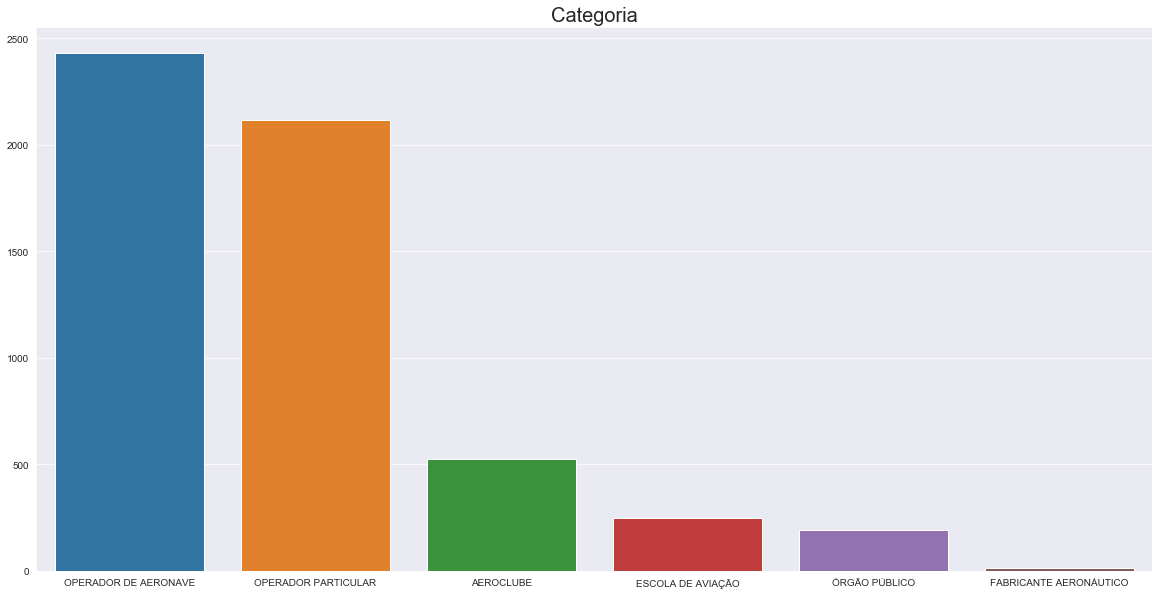

In [9]:
s, n = numpy.unique(anv["aeronave_operador_categoria"].to_numpy(), return_counts=True)
indices = numpy.flip(numpy.argsort(n))
_, axis = pyplot.subplots(figsize=(20, 10))
seaborn.barplot(y=n[indices], x=s[indices], orient='v')
axis.set_title("Categoria (Operador)", fontsize=20)
pyplot.show()

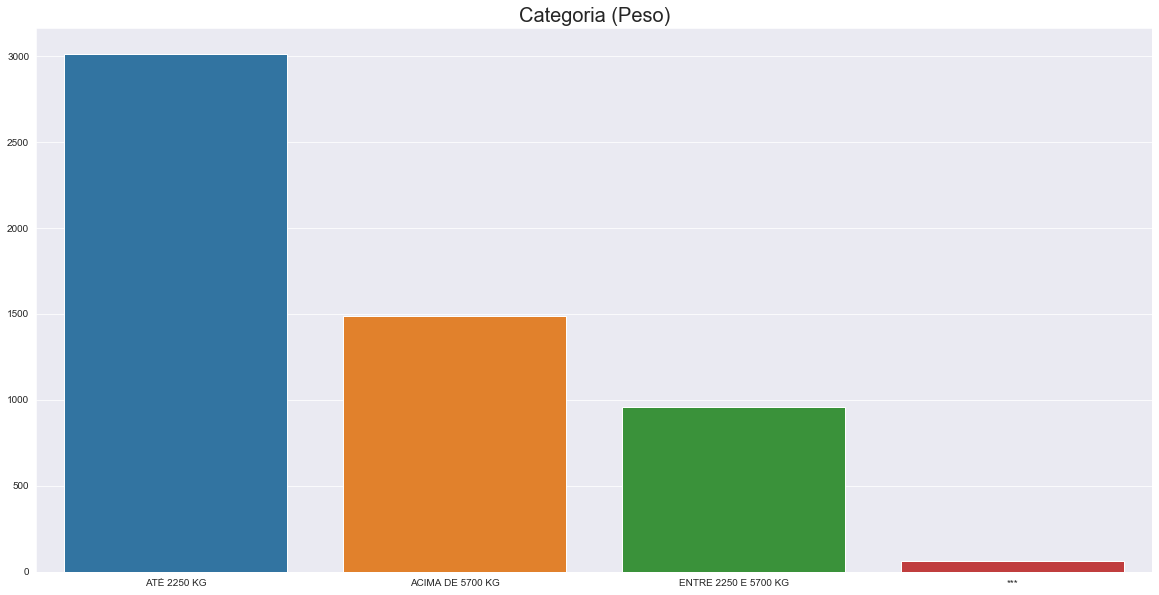

In [13]:
s, n = numpy.unique(anv["aeronave_pmd_categoria"].to_numpy(), return_counts=True)
indices = numpy.flip(numpy.argsort(n))
_, axis = pyplot.subplots(figsize=(20, 10))
seaborn.barplot(y=n[indices], x=s[indices], orient='v')
axis.set_title("Categoria (Peso)", fontsize=20)
pyplot.show()

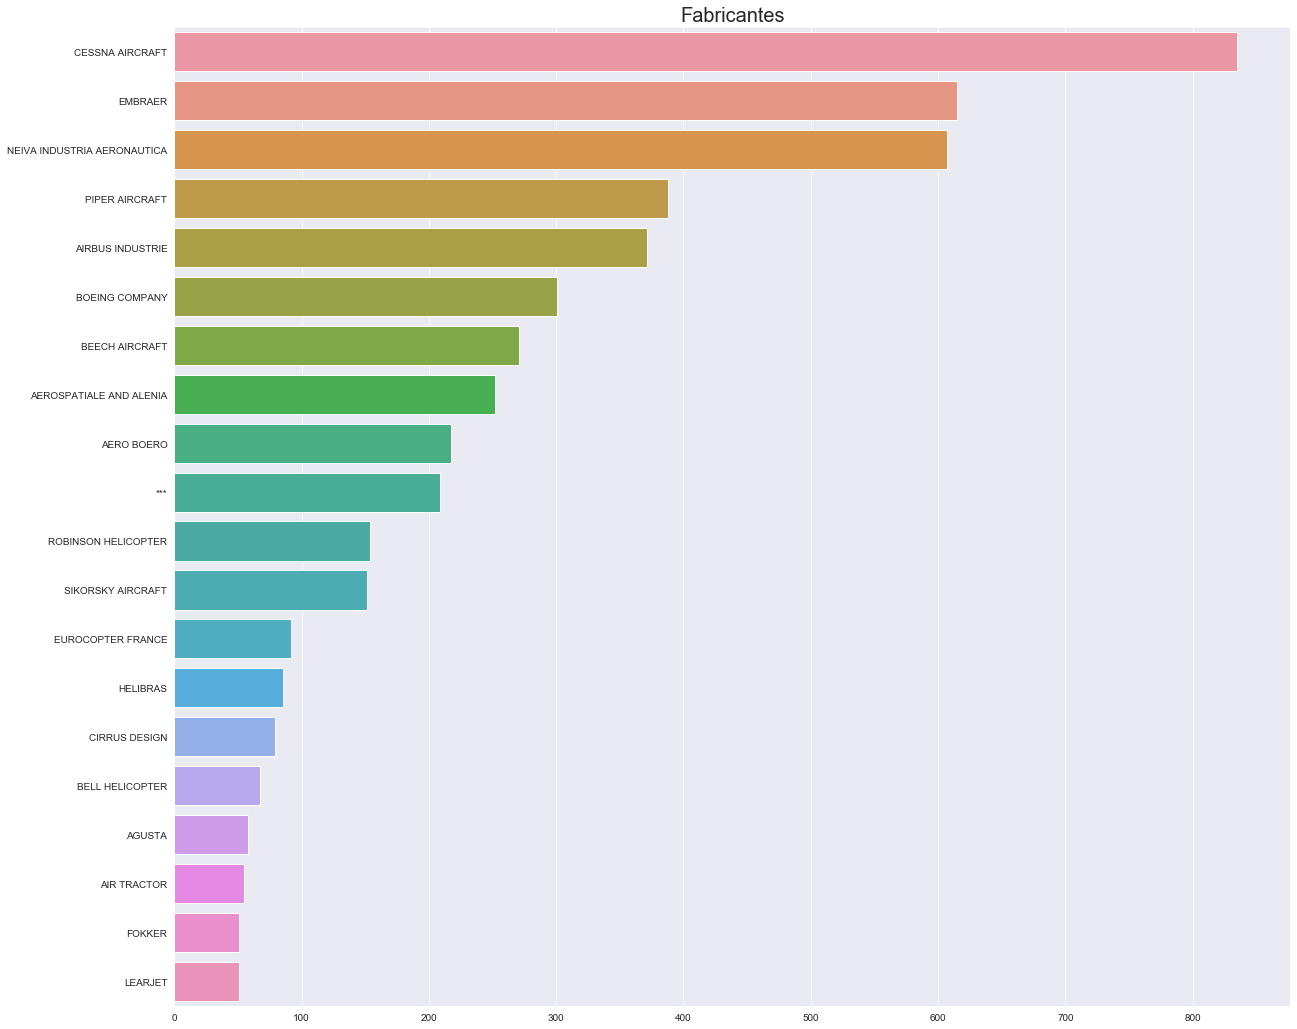

In [8]:
s, n = numpy.unique(anv["aeronave_fabricante"].to_numpy(), return_counts=True)
indices = numpy.flip(numpy.argsort(n))
_, axis = pyplot.subplots(figsize=(20, 18))
seaborn.barplot(x=n[indices][:20], y=s[indices][:20], orient='h')
axis.set_title("Fabricantes", fontsize=20)
pyplot.show()

##### Fatores contribuintes para o acidente

In [5]:
ftc = pd.read_csv('../data/ftc.csv', sep='~')
ftc

,codigo_ocorrencia,fator_nome,fator_aspecto,fator_condicionante,fator_area,fator_detalhe_fator,fator_dia_extracao
0,200901015424167,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,"A PROVÁVEL INTENÇÃO EM PRESERVAR A AERONAVE, C...",2019-05-31
1,200901015424167,MANUTENÇÃO DE AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,O RELATÓRIO TÉCNICO DO IAE REVELOU FALHAS ORIU...,2019-05-31
2,200901015424167,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,O OPERADOR NÃO PROGRAMOU A REALIZAÇÃO DE INSPE...,2019-05-31
3,200901055963381,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,O PILOTO ERA POUCO EXPERIENTE E REALIZOU O POU...,2019-05-31
4,200901055963381,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,"A POUCA EXPERIÊNCIA DO PILOTO, ALIADA AO EXCES...",2019-05-31
...,...,...,...,...,...,...,...
4625,201901141204402,DESORIENTAÇÃO,ASPECTO MÉDICO,***,FATOR HUMANO,NaN,2019-05-31
4626,201901141204402,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,NaN,2019-05-31
4627,201901141204402,CONDIÇÕES METEOROLÓGICAS ADVERSAS,***,***,***,NaN,2019-05-31
4628,201901141204402,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,NaN,2019-05-31


##### Ocorrências dos acidentes

In [6]:
oco = pd.read_csv('../data/oco.csv', sep='~')
oco

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
1,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2019-05-31
2,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,FINALIZADA,IG-084/CENIPA/2016,SIM,2019-03-11,7,1,NÃO,2019-05-31
3,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
4,201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,2011-03-18,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,201107163514591,INCIDENTE,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO,MAC,0.0000,0.0000,NÃO IDENTIFICADA,AM,BRASIL,****,2011-07-16,08:57:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
5456,201101107541931,INCIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,OUTROS,OTHR,0.0000,0.0000,NÃO IDENTIFICADA,PE,BRASIL,****,2011-01-10,03:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
5457,201502247981603,INCIDENTE GRAVE,COM PARA-BRISAS / JANELA / PORTA,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,RJ,BRASIL,****,2015-02-24,17:51:00,NaN,ATIVA,IG-027/CENIPA/2015,NÃO,NaN,0,1,NÃO,2019-05-31
5458,200910311058203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2009-10-31,12:10:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31


##### Recomendações de segurança

In [7]:
rec = pd.read_csv('../data/rec.csv', sep='~')
rec

,codigo_ocorrencia,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario_nome,dia_extracao_recomendacao
0,200901015424167,123/2012,2012-03-22,2012-04-20,NaN,Dar ampla divulgação aos operadores de aeronav...,AGUARDANDO RESPOSTA,ABAAC,ASSOCIAÇÃO BRASILEIRA DE AERONAVES ANTIGAS E C...,2019-05-31
1,200901015424167,122/2012,2012-03-22,2012-04-20,2012-11-26,Realizar fiscalização mais rigorosa na vistori...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31
2,200901015424167,121/2012,2012-03-22,2012-04-20,NaN,Aplicar processos que melhorem a qualidade da ...,AGUARDANDO RESPOSTA,AEROCAMP,AEROCAMP COMÉRCIO E SERVIÇOS AERONÁUTICOS,2019-05-31
3,200901015424167,120/2012,2012-03-22,2012-04-20,NaN,Promover a atualização de todos os registros d...,AGUARDANDO RESPOSTA,EXTREME,EXTREME DEMONSTRAÇÕES AÉREAS,2019-05-31
4,200901015424167,119/2012,2012-03-22,2012-04-20,NaN,Enfatizar o estrito cumprimento dos procedimen...,AGUARDANDO RESPOSTA,EXTREME,EXTREME DEMONSTRAÇÕES AÉREAS,2019-05-31
...,...,...,...,...,...,...,...,...,...,...
2054,201812301440298,A-192/CENIPA/2018-01,2019-05-16,2019-05-22,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31
2055,201901141204402,A-009/CENIPA/2019 - 01,2019-05-16,2019-05-22,NaN,Divulgar os ensinamentos colhidos com a presen...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31
2056,201902020208112,IG-025/CENIPA/2019 - 01,2019-05-16,2019-05-27,NaN,"Atuar junto ao Operador do Aeródromo de SWCA, ...",AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31
2057,201903061708253,IG-036/CENIPA/2019 - 01,2019-05-16,NaN,NaN,Atuar em conjunto com a OCEANAIR LINHAS AEREAS...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31


##### Não sei para que serve este CSV - Risco

In [8]:
risco_col = ['tipo_transporte', 'matricula', 'aerodromo', 'data', 'hora', 'fase_voo', 'efeito_voo']
risco = pd.read_csv('../data/risco.csv', sep=';', names=risco_col)
risco = risco.drop(risco.index[0]).reset_index()
risco

,index,tipo_transporte,matricula,aerodromo,data,hora,fase_voo,efeito_voo
0,1,AVISTAMENTO,FAB1925,SBYS,03/10/2019,08:10,Aproximação,Nenhum
1,2,AVISTAMENTO,PRUDS,SBUR,03/10/2019,17:00,Aproximação,Nenhum
2,3,AVISTAMENTO,NaN,SBSP,03/10/2019,09:35,Revisão de pista,Nenhum
3,4,AVISTAMENTO,NaN,SBUL,03/10/2019,15:30,Inspeção de trânsito/intervoo,Nenhum
4,5,AVISTAMENTO,NaN,SBBH,02/10/2019,13:33,Aproximação,Não reportada
...,...,...,...,...,...,...,...,...
947,948,QUASE COLISÃO,1944,SBYS,01/07/2019,16:00,Decolagem,Nenhum
948,949,AVISTAMENTO,FAB2318,SBNT,01/07/2019,12:45,Aproximação,Nenhum
949,950,COLISÃO,PRGEC,SWPI,01/07/2019,03:40,Pouso,Nenhum
950,951,QUASE COLISÃO,PRSED,9PCI,01/07/2019,16:20,Pouso,Nenhum


#### Criação do DataBase e instanciação das tabelas

Nesta parte serão feitas as criações das tabelas e instanciação dos dados contidos no DataFrame's criados acima.

In [16]:
connection = sqlite3.connect("database.db")
cursor = connection.cursor()

#### Checagem do DataBase criado.

In [24]:
# Aeronaves envolvidas no acidente
pd.read_sql('select * from AeronavesEnvolvidas', cursor)

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fase_operacao_icao,aeronave_tipo_operacao,aeronave_nivel_dano,total_fatalidades,aeronave_dia_extracao
0,201106142171203,PPGXE,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,2.0,1962.0,BRASIL,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,UNKNOWN,VOO DE INSTRUÇÃO,SUBSTANCIAL,0,2019-05-31
1,201205209591320,PTRBN,OPERADOR DE AERONAVE,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,ATÉ 2250 KG,6.0,1980.0,BRASIL,BRASIL,TPX,TÁXI AÉREO,****,****,APROXIMAÇÃO FINAL,APPROACH,TÁXI AÉREO,NENHUM,0,2019-05-31
2,201012015549851,PTKUK,OPERADOR DE AERONAVE,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,ENTRE 2250 E 5700 KG,7.0,1961.0,ESTADOS UNIDOS,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,LANDING,TÁXI AÉREO,LEVE,0,2019-05-31
3,201708190325167,PTKUK,OPERADOR PARTICULAR,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,ENTRE 2250 E 5700 KG,7.0,1961.0,ESTADOS UNIDOS,BRASIL,SAE,ESPECIALIZADA,SBCP,SBCP,CRUZEIRO,EN ROUTE,OPERAÇÃO ESPECIALIZADA,LEVE,0,2019-05-31
4,201803182255192,PPGSZ,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,2.0,1960.0,BRASIL,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,ARREMETIDA NO SOLO,APPROACH,VOO DE INSTRUÇÃO,LEVE,0,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,201903271943019,PRFKU,OPERADOR PARTICULAR,AVIÃO,AIR TRACTOR,AT-502,AT5T,TURBOÉLICE,MONOMOTOR,2948,ENTRE 2250 E 5700 KG,1.0,1991.0,None,BRASIL,SAE-AG,AGRÍCOLA,****,****,DECOLAGEM,TAKEOFF,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,0,2019-05-31
5519,201904241650016,PPSEK,OPERADOR PARTICULAR,HELICÓPTERO,ROBINSON HELICOPTER,R44 II,R44,PISTÃO,MONOMOTOR,1134,ATÉ 2250 KG,4.0,2007.0,ESTADOS UNIDOS,BRASIL,TPP,PARTICULAR,###!,SBCN,CRUZEIRO,EN ROUTE,VOO PRIVADO,NENHUM,0,2019-05-31
5520,201904261718061,N100QR,OPERADOR PARTICULAR,AVIÃO,CANADAIR,CL-600-1A11,CL60,JATO,BIMOTOR,20457,ACIMA DE 5700 KG,NaN,1982.0,None,ESTADOS UNIDOS,TPP,PARTICULAR,SADF,SBCB,APROXIMAÇÃO FINAL,APPROACH,VOO PRIVADO,NENHUM,0,2019-05-31
5521,201905061442135,PRCGF,OPERADOR DE AERONAVE,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,S92,TURBOEIXO,***,12020,ACIMA DE 5700 KG,NaN,2012.0,None,BRASIL,TPX,TÁXI AÉREO,SBCP,SBCP,SUBIDA,EN ROUTE,TÁXI AÉREO,NENHUM,0,2019-05-31


In [23]:
# Fatores contribuintes
pd.read_sql('select * from FatoresContribuintes limit 5', cursor)

,codigo_ocorrencia,fator_nome,fator_aspecto,fator_condicionante,fator_area,fator_detalhe_fator,fator_dia_extracao
0,200901015424167,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,"A PROVÁVEL INTENÇÃO EM PRESERVAR A AERONAVE, C...",2019-05-31
1,200901015424167,MANUTENÇÃO DE AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,O RELATÓRIO TÉCNICO DO IAE REVELOU FALHAS ORIU...,2019-05-31
2,200901015424167,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,O OPERADOR NÃO PROGRAMOU A REALIZAÇÃO DE INSPE...,2019-05-31
3,200901055963381,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,O PILOTO ERA POUCO EXPERIENTE E REALIZOU O POU...,2019-05-31
4,200901055963381,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,"A POUCA EXPERIÊNCIA DO PILOTO, ALIADA AO EXCES...",2019-05-31


In [12]:
# Ocorrencias de acidentes
pd.read_sql('select * from Ocorrencias limit 5', cursor)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,None,FINALIZADA,***,NÃO,None,0,1,NÃO,2019-05-31
1,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,None,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2019-05-31
2,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,FINALIZADA,IG-084/CENIPA/2016,SIM,2019-03-11,7,1,NÃO,2019-05-31
3,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,None,0,1,NÃO,2019-05-31
4,201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,2011-03-18,13:30:00,None,FINALIZADA,***,NÃO,None,0,1,NÃO,2019-05-31


In [13]:
# Recomendacoes de seguranca
pd.read_sql('select * from RecomendacoesSeguranca limit 5', cursor)

,codigo_ocorrencia,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario_nome,dia_extracao_recomendacao
0,200901015424167,123/2012,2012-03-22,2012-04-20,None,Dar ampla divulgação aos operadores de aeronav...,AGUARDANDO RESPOSTA,ABAAC,ASSOCIAÇÃO BRASILEIRA DE AERONAVES ANTIGAS E C...,2019-05-31
1,200901015424167,122/2012,2012-03-22,2012-04-20,2012-11-26,Realizar fiscalização mais rigorosa na vistori...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31
2,200901015424167,121/2012,2012-03-22,2012-04-20,None,Aplicar processos que melhorem a qualidade da ...,AGUARDANDO RESPOSTA,AEROCAMP,AEROCAMP COMÉRCIO E SERVIÇOS AERONÁUTICOS,2019-05-31
3,200901015424167,120/2012,2012-03-22,2012-04-20,None,Promover a atualização de todos os registros d...,AGUARDANDO RESPOSTA,EXTREME,EXTREME DEMONSTRAÇÕES AÉREAS,2019-05-31
4,200901015424167,119/2012,2012-03-22,2012-04-20,None,Enfatizar o estrito cumprimento dos procedimen...,AGUARDANDO RESPOSTA,EXTREME,EXTREME DEMONSTRAÇÕES AÉREAS,2019-05-31


### 4. Diagrama ER

### 5. Diagrama relacional

### 6. Consultas

### 6.1 Duas consultas envolvendo seleção e projeção

### 6.1.1 Consulta 1 (duas versões)

### 6.1.2 Consulta 2 (duas versões)

### 6.2 Três consultas envolvendo junção de duas relações

### 6.2.1 Consulta 3 (duas versões)

### 6.2.2 Consulta 4 (duas versões)

### 6.2.3 Consulta 5 (duas versões)

### 6.3 Três consultas envolvendo junção de três ou mais relações

### 6.3.1 Consulta 6 (duas versões)

### 6.3.2 Consulta 7 (duas versões)

### 6.3.3 Consulta 8 (duas versões)

### 6.4 Duas consultas envolvendo agregação sobre junção de duas ou mais relações

### 6.4.1 Consulta 9 (duas versões)

### 6.4.2 Consulta 10 (duas versões)

### 7. Autoavaliação dos membros